In [636]:
data = pd.read_csv('C:/Users/camil/OneDrive/Escritorio/PracticaAI/MisNotasDelCurso/PruebasMias/2374_3987_bundle_archive/column_2C_weka.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [632]:
import os
from graphviz import Source
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [634]:
from sklearn import metrics

In [630]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

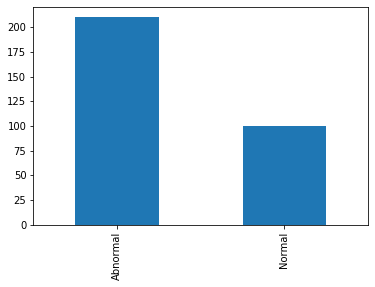

In [640]:
data.clase.value_counts().plot.bar()

In [638]:
data.shape

(310, 7)

In [639]:
data['clase'] = data['class']

In [642]:
colnames = data.columns.values.tolist()
predictors = colnames[:6]
target = colnames[7]

In [641]:
colnames = data.columns.values.tolist()
colnames

['pelvic_incidence',
 'pelvic_tilt numeric',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'class',
 'clase']

In [643]:
from sklearn.model_selection import train_test_split
import sklearn
train, test = train_test_split(data, test_size = 0.20)

#### uso el for para evaluar con que parametro va mejor 

In [702]:
'''
for i in range(2,40):
    tree = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_split=10, random_state=99,min_samples_leaf= 7) #= 
    tree.fit(train[predictors], train[target])
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    score = np.mean(cross_val_score(tree, train[predictors], train[target], scoring='accuracy',cv=cv,n_jobs=1))
    print('para i = ',i,'  el score = ',score)
 '''

"\nfor i in range(2,40):\n    tree = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_split=10, random_state=99,min_samples_leaf= 7) #= \n    tree.fit(train[predictors], train[target])\n    cv = KFold(n_splits=5, shuffle=True, random_state=1)\n    score = np.mean(cross_val_score(tree, train[predictors], train[target], scoring='accuracy',cv=cv,n_jobs=1))\n    print('para i = ',i,'  el score = ',score)\n "

In [703]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_split=10, random_state=99,min_samples_leaf= 7) 
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

#### Cross validation para evaluar eficacia del modelo

In [704]:
X = data[predictors]
Y = data[target]
cv = KFold(n_splits=5, shuffle=True, random_state=1)
score = np.mean(cross_val_score(tree, train[predictors], train[target], scoring='accuracy',cv=cv,n_jobs=1))
score

0.8671836734693879

#### hago una cross tab para evaluar eficacia con mis valores de test

In [705]:
pred = tree.predict(test[predictors])
pd.crosstab(test[target],pred,rownames=['Actual'],colnames=['predictions'])

predictions,Abnormal,Normal
Actual,,
Abnormal,37,6
Normal,8,11


In [706]:
metrics.accuracy_score(test[target], pred)

0.7741935483870968

In [707]:
tree.score(test[predictors], test[target])

0.7741935483870968

## Random forest classi

In [708]:
from  sklearn.ensemble import RandomForestClassifier

In [729]:
'''
for i in range(2,40):
    forest = RandomForestClassifier(n_jobs=2, oob_score=True,n_estimators=10, max_features=i)
    forest.fit(train[predictors], train[target])
    cv = KFold(n_splits=20, shuffle=True, random_state=1)
    score = np.mean(cross_val_score(forest, train[predictors], train[target], scoring='accuracy',cv=cv,n_jobs=1))
    print('para prof max = ',i,'  el score = ',score)
 '''

"\nfor i in range(2,40):\n    forest = RandomForestClassifier(n_jobs=2, oob_score=True,n_estimators=10, max_features=i)\n    forest.fit(train[predictors], train[target])\n    cv = KFold(n_splits=20, shuffle=True, random_state=1)\n    score = np.mean(cross_val_score(forest, train[predictors], train[target], scoring='accuracy',cv=cv,n_jobs=1))\n    print('para prof max = ',i,'  el score = ',score)\n "

In [740]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True,n_estimators=1000)#,max_features=2, max_depth=20 )
forest.fit(train[predictors], train[target])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [741]:
#forest.oob_decision_function_

In [742]:
forest.oob_score_

0.8669354838709677

In [743]:
pred = forest.predict(test[predictors])
pd.crosstab(test[target],pred,rownames=['Actual'],colnames=['predictions'])

predictions,Abnormal,Normal
Actual,,
Abnormal,36,7
Normal,6,13


In [744]:
metrics.accuracy_score(test[target], pred)


0.7903225806451613